# **Desafio 03 - GFT**

## **1. Desafio de Negócio**

O desafio GFT de Open Finance permitrá aos participantes deparar-se com a nova realidade de compartilhamento de informações, confrotando bases de 3 instituições diferentes (2 bancos e 1 seguradora) e a partir destes dados, desenvolver uma visão holística aprimorada do cliente e via Ciência de Dados, realizar a modelagem da melhor oferta e cesta de produtos para estes clientes. Serão praticadas habilidades de engenharia de dados e ciência de dados!

A Open Finance é a evolução do Open Banking, é o sistema financeiro aberto que vai trazer mais transparência e autonomia para os usuários. Com ele, será possível que um indivíduo decida quais instituções terão acesso às informações, para quais finalidades e período específicos.

O desafio consiste de agregar as bases destas instituições proporcionadas pelo novo ambiente do Open Finance, realizar o tratamento dos dados e desenvolver modelos de recomendação de produtos a partir do uso de algoritmos como os de [Regras de Associação](https://en.wikipedia.org/wiki/Association_rule_learning#Algorithms), considerando uma confiança na regra de 80% e um suporte mínimo de 10% com no máximo 5 antecedentes.

Os índividuos da base serão escoradas por este modelo e o arquivo resposta com as recomendações deve ser submetido para análise com a qual será averiguado o percentual de acerto de cada recomendação.

Vale lembrar que mutios indivíduos ficarão sem recomendação.

## **2. Preparações dos Dados**

### **2.1 Importação dos Pacotes**

In [850]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### **2.2 Importação dos Dados**

In [851]:
insurance_company = pd.read_csv('data/InsuranceCompanyABC.csv')
investment_bank = pd.read_csv('data/InvestmentBankCDE.csv')
retail_bank = pd.read_csv('data/RetailBankEFG.csv')
answers = pd.read_csv('data/ANSWERS.csv')
answers_modify = answers.copy()

ids = insurance_company['ID'].map(int)

In [852]:
insurance_company = insurance_company.drop('ID', axis = 1)
retail_bank = retail_bank.drop('ID', axis = 1)
investment_bank = investment_bank.drop('ID', axis = 1)

answers_modify['ID'] = answers_modify['ID'].map(int)
answers_modify = answers_modify.set_index('ID')

In [853]:
print("A tabela insurance_company possui {} linhas e {} colunas.".format(*insurance_company.shape))
insurance_company.head()

A tabela insurance_company possui 10082 linhas e 8 colunas.


,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial
0,42.993,4428.512,NE,1.0,T,T,T,T
1,26.373,4489.930,CO,0.0,T,T,T,T
2,46.977,4567.741,CO,0.0,F,F,F,F
3,24.311,4592.132,NE,0.0,F,F,F,F
4,28.896,4723.197,SE,1.0,F,F,F,F


In [854]:
print("A tabela retail_bank possui {} linhas e {} colunas.".format(*retail_bank.shape))
retail_bank.head()

A tabela retail_bank possui 10082 linhas e 9 colunas.


,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,T,T,T,T,T,F,F,T,F
1,T,T,T,T,T,F,F,F,T
2,F,F,F,F,F,F,F,F,F
3,F,F,F,F,F,F,F,F,F
4,F,T,T,T,T,T,T,T,T


In [855]:
print("A tabela investment_bank possui {} linhas e {} colunas.".format(*investment_bank.shape))
investment_bank.head()

A tabela investment_bank possui 10082 linhas e 7 colunas.


,Investimento Fundos_cambiais,Investimento Fundos_commodities,Investimento LCI,Investimento LCA,Investimento Poupanca,Investimento Fundos Multimercado,Investimento Tesouro Direto
0,F,F,F,F,F,F,F
1,F,F,F,F,F,F,F
2,F,F,F,F,F,F,F
3,T,T,T,T,T,T,T
4,F,F,T,F,T,T,F


In [856]:
join_df = insurance_company.join(investment_bank)
join_df = join_df.join(retail_bank)
join_df

,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,...,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
0,42.993,4428.512,NE,1.0,T,T,T,T,F,F,...,F,T,T,T,T,T,F,F,T,F
1,26.373,4489.930,CO,0.0,T,T,T,T,F,F,...,F,T,T,T,T,T,F,F,F,T
2,46.977,4567.741,CO,0.0,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
3,24.311,4592.132,NE,0.0,F,F,F,F,T,T,...,T,F,F,F,F,F,F,F,F,F
4,28.896,4723.197,SE,1.0,F,F,F,F,F,F,...,F,F,T,T,T,T,T,T,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,40.087,10317.038,SE,0.0,F,F,F,T,F,T,...,F,F,F,F,F,F,F,F,F,F
10078,31.589,10356.298,SE,1.0,F,F,F,F,F,T,...,F,F,F,F,F,F,F,F,T,F
10079,18.783,10527.464,SE,0.0,F,F,F,F,F,F,...,F,F,F,T,T,T,T,T,T,T
10080,19.480,10571.948,CO,1.0,F,F,F,F,T,T,...,T,T,F,F,F,F,F,T,T,F


In [857]:
join_df.insert(0, 'ID', ids)
join_df = join_df.set_index('ID')
join_df

,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,Investimento Fundos_commodities,...,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
ID,,,,,,,,,,,,,,,,,,,,,
71504,42.993,4428.512,NE,1.0,T,T,T,T,F,F,...,F,T,T,T,T,T,F,F,T,F
59751,26.373,4489.930,CO,0.0,T,T,T,T,F,F,...,F,T,T,T,T,T,F,F,F,T
11877,46.977,4567.741,CO,0.0,F,F,F,F,F,F,...,F,F,F,F,F,F,F,F,F,F
33701,24.311,4592.132,NE,0.0,F,F,F,F,T,T,...,T,F,F,F,F,F,F,F,F,F
62029,28.896,4723.197,SE,1.0,F,F,F,F,F,F,...,F,F,T,T,T,T,T,T,T,T
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93046,40.087,10317.038,SE,0.0,F,F,F,T,F,T,...,F,F,F,F,F,F,F,F,F,F
55486,31.589,10356.298,SE,1.0,F,F,F,F,F,T,...,F,F,F,F,F,F,F,F,T,F
95085,18.783,10527.464,SE,0.0,F,F,F,F,F,F,...,F,F,F,T,T,T,T,T,T,T


## **3. Análise Exploratória dos Dados**

In [858]:
join_df.describe()

,Idade,Renda,Genero
count,10082.000000,10082.000000,10082.000000
mean,38.461186,7783.396381,0.548601
std,12.212422,7303.024782,0.497657
min,18.009000,2312.000000,0.000000
25%,28.925500,6971.313000,0.000000
50%,37.229500,7522.556000,1.000000
75%,46.639500,8061.152000,1.000000
max,85.605000,580000.000000,1.000000


In [859]:
join_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10082 entries, 71504 to 85914
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Idade                             10082 non-null  float64
 1   Renda                             10082 non-null  float64
 2   Regiao                            10082 non-null  object 
 3   Genero                            10082 non-null  float64
 4   seguro auto                       10082 non-null  object 
 5   seguro vida Emp                   10082 non-null  object 
 6   seguro vida PF                    10082 non-null  object 
 7   Seguro Residencial                10082 non-null  object 
 8   Investimento Fundos_cambiais      10082 non-null  object 
 9   Investimento Fundos_commodities   10082 non-null  object 
 10  Investimento LCI                  10082 non-null  object 
 11  Investimento LCA                  10082 non-null  object 
 12  

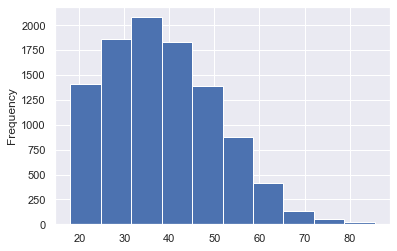

In [860]:
join_df['Idade'].plot(kind = 'hist')
plt.show()

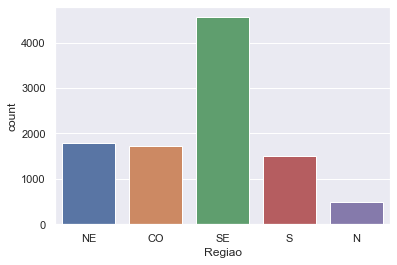

In [861]:
sns.countplot(x = join_df['Regiao'])
plt.show()

In [862]:
# Transformação da variável Age em Grupos
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
join_df.insert(1,'Idade_Grupo', pd.cut(join_df['Idade'], bins, labels = labels, include_lowest = True).astype('object'))
answers_modify.insert(1,'Idade_Grupo', pd.cut(answers_modify['Idade'], bins, labels = labels, include_lowest = True).astype('object'))
join_df['Idade_Grupo'].head()

ID
71504    40-49
59751    18-29
11877    40-49
33701    18-29
62029    18-29
Name: Idade_Grupo, dtype: object

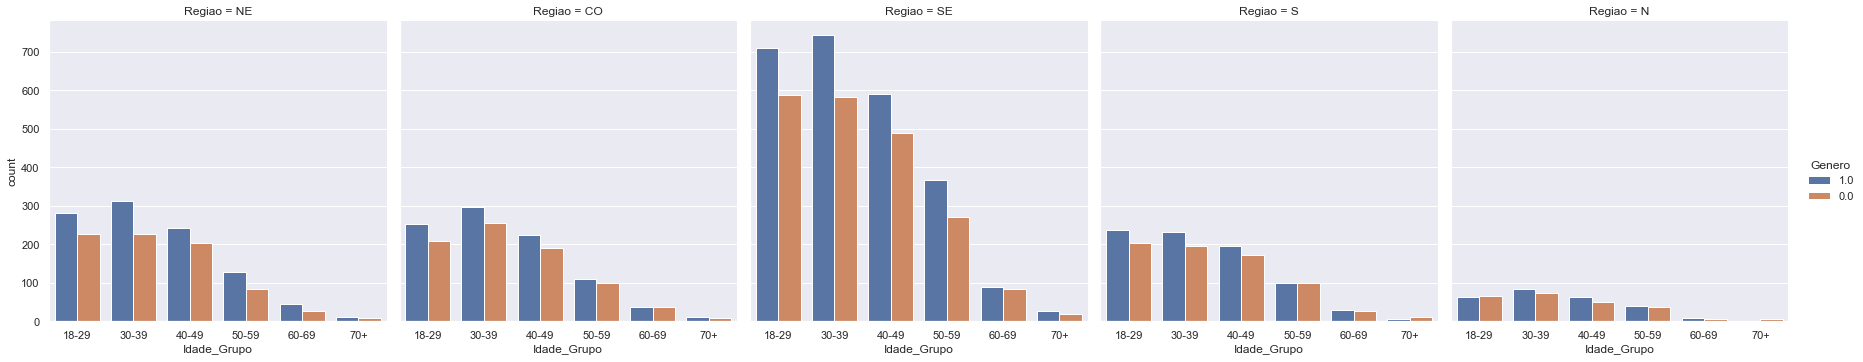

In [863]:
sns.catplot(data = join_df, x = 'Idade_Grupo', kind='count', col = 'Regiao', hue = 'Genero', order=join_df['Idade_Grupo'].value_counts().sort_index().index, hue_order=[1.0, 0.0])
plt.show()

<AxesSubplot:>

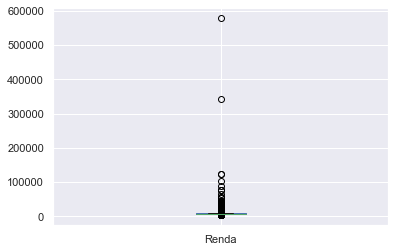

In [864]:
join_df['Renda'].plot(kind = 'box')

In [865]:
join_df.iloc[:,5:] = join_df.iloc[:,5:].applymap(lambda x : True if x == 'T' else False)
answers_modify.iloc[:,5:-6] = answers_modify.iloc[:,5:-6].applymap(lambda x : True if x == 'T' else False)
join_df

,Idade,Idade_Grupo,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Investimento Tesouro Direto,Financiamento Casa,Financiamento Carro,Emprestimo _pessoal,Emprestimo _consignado,Emprestimo _limite_especial,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos
ID,,,,,,,,,,,,,,,,,,,,,
71504,42.993,40-49,4428.512,NE,1.0,True,True,True,True,False,...,False,True,True,True,True,True,False,False,True,False
59751,26.373,18-29,4489.930,CO,0.0,True,True,True,True,False,...,False,True,True,True,True,True,False,False,False,True
11877,46.977,40-49,4567.741,CO,0.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33701,24.311,18-29,4592.132,NE,0.0,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,False
62029,28.896,18-29,4723.197,SE,1.0,False,False,False,False,False,...,False,False,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93046,40.087,40-49,10317.038,SE,0.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
55486,31.589,30-39,10356.298,SE,1.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
95085,18.783,18-29,10527.464,SE,0.0,False,False,False,False,False,...,False,False,False,True,True,True,True,True,True,True


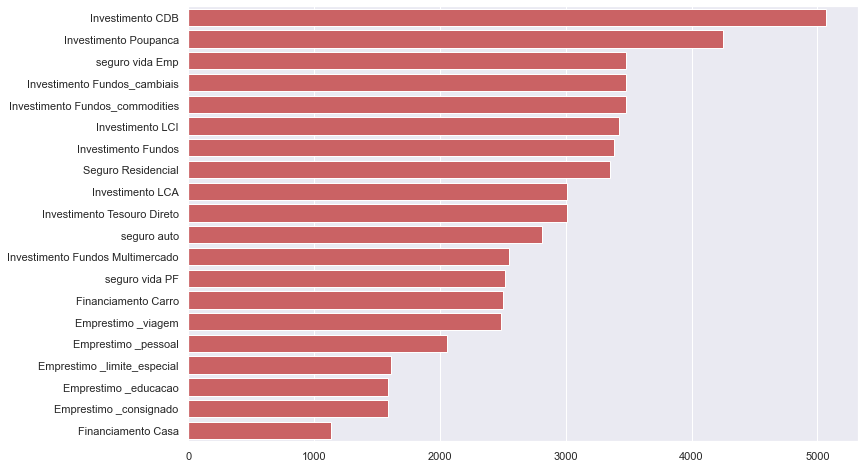

In [866]:
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x = join_df.iloc[:,5:].sum().values, y=join_df.iloc[:,5:].sum().index, color='#DB5153', order = join_df.iloc[:,5:].sum().sort_values(ascending=False).index)
plt.show()

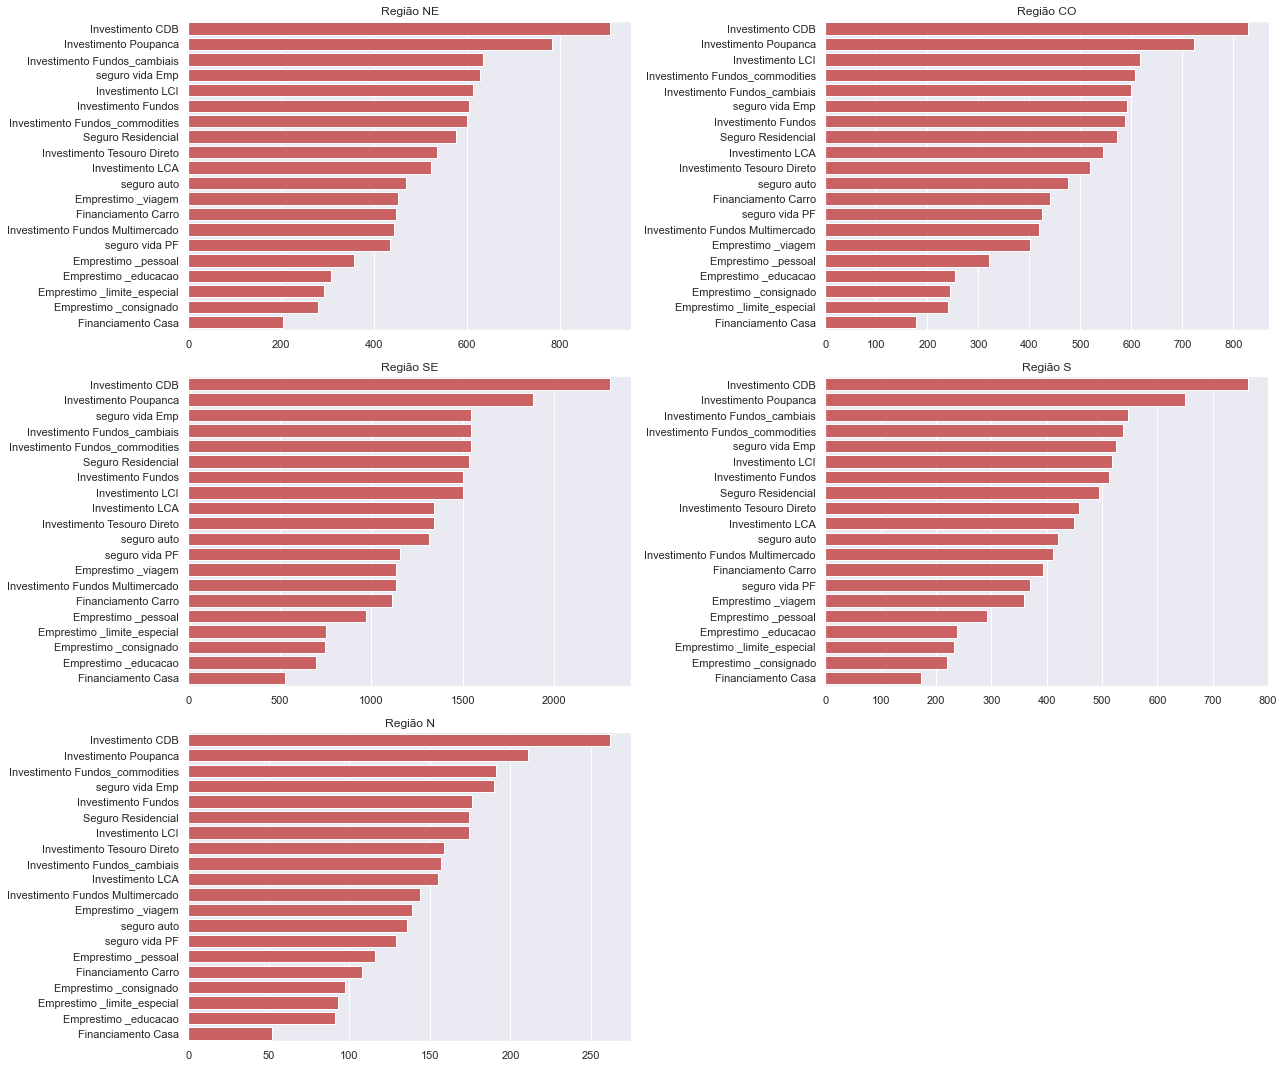

In [867]:
fig, axes = plt.subplots(3, 2, figsize=(18,15))

ax_row, ax_col = 0, 0
for regiao in join_df['Regiao'].unique() :
    sns.barplot(x = join_df.query(f'Regiao == "{regiao}"').iloc[:,5:].sum().values, y=join_df.query(f'Regiao == "{regiao}"').iloc[:,5:].sum().index, 
                order=join_df.query(f'Regiao == "{regiao}"').iloc[:,5:].sum().sort_values(ascending=False).index, ax=axes[ax_row, ax_col], color = '#DB5153')
    
    axes[ax_row, ax_col].set_title(f'Região {regiao}')
    
    ax_col += 1
    if ax_col == 2 :
        ax_col = 0
        ax_row += 1

fig.delaxes(axes[2,1])
fig.tight_layout()    

In [868]:
# Criação de uma coluna que representa uma lista com os itens = True
def lista_itens(linha) :
    return list(linha[linha].index)

join_df['itens'] = join_df.iloc[:,5:].apply(lista_itens, axis = 1)
answers_modify['itens'] = answers_modify.iloc[:,5:-6].apply(lista_itens, axis = 1)
join_df['itens']

ID
71504    [seguro auto, seguro vida Emp, seguro vida PF,...
59751    [seguro auto, seguro vida Emp, seguro vida PF,...
11877                                                   []
33701    [Investimento Fundos_cambiais, Investimento Fu...
62029    [Investimento LCI, Investimento Poupanca, Inve...
                               ...                        
93046    [Seguro Residencial, Investimento Fundos_commo...
55486    [Investimento Fundos_commodities, Investimento...
95085    [Investimento LCI, Investimento LCA, Investime...
45040    [Investimento Fundos_cambiais, Investimento Fu...
85914    [Emprestimo _viagem, Investimento CDB, Investi...
Name: itens, Length: 10082, dtype: object

## **4. Construção das Regras de Associação**

Primeiramente, iremos realizar a construção das regras de associação sem utilizar as colunas de ```Idade```, ```Genero```, ```Renda``` e ```Regiao```.

### **Utilização do Apyori**

In [869]:
import apyori

In [870]:
from apyori import apriori
results = list(apriori(join_df['itens'], min_support = 0.1, min_confidence = 0.8))

rules_apyori = pd.DataFrame(columns=('antecedent','consequent','support','confidence','lift'))

Support =[]
Confidence = []
Lift = []
Antecedent = []
Consequent=[]

for RelationRecord in results:
    for ordered_stat in RelationRecord.ordered_statistics:
        Support.append(RelationRecord.support)
        Antecedent.append(ordered_stat.items_base)
        Consequent.append(ordered_stat.items_add)
        Confidence.append(ordered_stat.confidence)
        Lift.append(ordered_stat.lift)
                                 
rules_apyori['antecedent'] = list(map(set, Antecedent))
rules_apyori['consequent'] = list(map(set, Consequent))
rules_apyori['support'] = Support
rules_apyori['confidence'] = Confidence
rules_apyori['lift']= Lift

rules_apyori['antecedent'] = [list(item) for item in rules_apyori['antecedent']]
rules_apyori['consequent'] = [list(item) for item in rules_apyori['consequent']]

rules_apyori

,antecedent,consequent,support,confidence,lift
0,[Emprestimo _educacao],[Investimento CDB],0.130926,0.831234,1.653612
1,[Emprestimo _educacao],[Investimento Fundos],0.126165,0.801008,2.387159
2,[seguro vida PF],[Seguro Residencial],0.215334,0.862878,2.594552
3,[seguro vida PF],[seguro auto],0.202638,0.812003,2.909245
4,[seguro vida PF],[seguro vida Emp],0.207003,0.829491,2.403141
...,...,...,...,...,...
152,"[Investimento Fundos_commodities, Investimento...",[Investimento Poupanca],0.123884,0.944781,2.242297
153,"[Investimento Fundos_commodities, Investimento...",[Investimento LCI],0.123884,0.989699,2.914178
154,"[Investimento Fundos_commodities, Investimento...",[Investimento LCA],0.123884,0.888968,2.973648
155,"[Investimento LCA, Investimento LCI, Investime...",[Investimento Fundos_commodities],0.123884,0.988915,2.865836


# Como utilizar cada item de answers_modify['itens'] para buscar os antecedent de rules_apyori?

In [871]:
answers_modify['itens_len'] = answers_modify['itens'].str.len()
answers_modify

,Idade,Idade_Grupo,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3,itens,itens_len
ID,,,,,,,,,,,,,,,,,,,,,
1004,40.685,40-49,8474.687,CO,1.0,False,False,False,False,False,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,"[Investimento Fundos_commodities, Investimento...",4
1028,56.693,50-59,7996.353,SE,0.0,False,False,False,False,True,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,[Investimento Fundos_cambiais],1
1034,49.413,40-49,8624.335,NE,0.0,True,True,True,True,False,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,"[seguro auto, seguro vida Emp, seguro vida PF,...",5
1035,22.764,18-29,6885.196,S,1.0,False,False,False,True,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"[Seguro Residencial, Investimento LCA]",2
1039,22.059,18-29,7749.965,NE,1.0,True,True,True,True,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"[seguro auto, seguro vida Emp, seguro vida PF,...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100932,28.659,18-29,8804.506,S,1.0,False,False,False,False,False,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,"[Investimento Fundos_commodities, Investimento...",4
100962,20.505,18-29,6809.895,SE,0.0,False,False,False,False,False,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,"[Investimento Fundos Multimercado, Emprestimo ...",4
100963,21.067,18-29,6201.485,SE,1.0,False,False,False,False,False,...,True,False,NaN,NaN,NaN,NaN,NaN,NaN,"[Investimento Fundos_commodities, Investimento...",3


In [872]:
def retorna_df(item, df_itemset) :
    rules_itemset = rules_apyori[rules_apyori['antecedent'].apply(lambda x: any([item in x]))] # Verifica em rules_apyori se possui o item
    df_itemset = df_itemset.append(rules_itemset) # Realiza o append das linhas que haviam o teim em rules_apyori
    return df_itemset

values_consequent_1 = []
values_consequent_2 = []
values_consequent_3 = []

values_confidence_1 = []
values_confidence_2 = []
values_confidence_3 = []

# for index in range(103,len(answers_modify))
for index in range(len(answers_modify)) :
    itens = answers_modify.iloc[index]['itens']
    len_itens = answers_modify.iloc[index]['itens_len']
    
    if len_itens > 0 :
        
        df_itemset = pd.DataFrame(columns = ['antecedent', 'consequent', 'support', 'confidence', 'lift'])
        
        for item in itens :
            df_itemset = retorna_df(item, df_itemset)
            df_itemset = df_itemset[~df_itemset.index.duplicated(keep='first')] # Remove os índices duplicados
        
        if len(df_itemset) > 0 : # Verificação len(df_itemset) > 0
            df_itemset = df_itemset[df_itemset['consequent'].str.len() == 1] # Pegamos apenas recomendações onde o tamanho é 1
            df_itemset = df_itemset[~df_itemset['antecedent'].map(lambda antecedents : any([x for x in antecedents if x not in itens]))] # Retorna apenas os antecedents que estão na lista "itens"
            df_itemset = df_itemset[df_itemset['consequent'].map(lambda consequent : any([x for x in consequent if x not in itens]))]    # Remove os consequentes que estão na lista "itens"
            
            if len(df_itemset) == 0 : # Necessário porque realizamos a remoção dos antecedents que não estão na lista "itens" e dos consequentes que estão na lista "itens"
                values_consequent_1.append('')
                values_consequent_2.append('')
                values_consequent_3.append('')
                values_confidence_1.append(np.nan)
                values_confidence_2.append(np.nan)
                values_confidence_3.append(np.nan)
            
            else : # Verificação len(df_itemset) != 0
                df_itemset = df_itemset.sort_values('confidence', ascending = False) # Ordenação por Confidence
                df_itemset['consequent'] = [str(x)[2:-2] for x in df_itemset['consequent']] # Transformação dos consequents em strings
                df_itemset = df_itemset.drop_duplicates(subset='consequent', keep = 'first') # Remoção dos valores repetidos para consequent
                df_itemset = df_itemset.sort_values('lift', ascending = False).iloc[:3] # Ordenação por lift
                
                if len(df_itemset) == 1 : #Retorno quando temos apenas um consequent
                    values_consequent_1.append(df_itemset['consequent'].iloc[0])
                    values_consequent_2.append('')
                    values_consequent_3.append('')
            
                    values_confidence_1.append(df_itemset['confidence'].iloc[0])
                    values_confidence_2.append(np.nan)
                    values_confidence_3.append(np.nan)
            
                elif len(df_itemset) == 2 : #Retorno quando temos 2 consequent
                    values_consequent_1.append(df_itemset['consequent'].iloc[0])
                    values_consequent_2.append(df_itemset['consequent'].iloc[1])
                    values_consequent_3.append('')
            
                    values_confidence_1.append(df_itemset['confidence'].iloc[0])
                    values_confidence_2.append(df_itemset['confidence'].iloc[1])
                    values_confidence_3.append(np.nan)
            
                elif len(df_itemset) == 3 : #Retorno quando temos 3 consequent
                    values_consequent_1.append(df_itemset['consequent'].iloc[0])
                    values_consequent_2.append(df_itemset['consequent'].iloc[1])
                    values_consequent_3.append(df_itemset['consequent'].iloc[2]) 
            
                    values_confidence_1.append(df_itemset['confidence'].iloc[0])
                    values_confidence_2.append(df_itemset['confidence'].iloc[1])
                    values_confidence_3.append(df_itemset['confidence'].iloc[2])
    
        else : #Verificação len(df_itemset) <= 0
            values_consequent_1.append('')
            values_consequent_2.append('')
            values_consequent_3.append('')
            values_confidence_1.append(np.nan)
            values_confidence_2.append(np.nan)
            values_confidence_3.append(np.nan)
    
    else : #Verificação len_itens <= 0
        values_consequent_1.append('')
        values_consequent_2.append('')
        values_consequent_3.append('')
        values_confidence_1.append(np.nan)
        values_confidence_2.append(np.nan)
        values_confidence_3.append(np.nan)

In [874]:
answers_modify['RECOMMENDATION_1'] = values_consequent_1
answers_modify['CONFIDENCE_1'] = values_confidence_1

answers_modify['RECOMMENDATION_2'] = values_consequent_2
answers_modify['CONFIDENCE_2'] = values_confidence_2

answers_modify['RECOMMENDATION_3'] = values_consequent_3
answers_modify['CONFIDENCE_3'] = values_confidence_3

In [876]:
answers_modify['RECOMMENDATION_1'].value_counts()

                                   7999
Investimento LCI                   1253
Investimento Fundos_commodities     814
seguro auto                         614
seguro vida PF                      574
Investimento CDB                    520
Investimento Fundos                 489
Investimento LCA                    421
Emprestimo _viagem                  275
Investimento Fundos_cambiais        254
Emprestimo _educacao                199
Emprestimo _consignado               80
Investimento Poupanca                79
Emprestimo _limite_especial          46
Seguro Residencial                   46
seguro vida Emp                      43
Emprestimo _pessoal                  24
Name: RECOMMENDATION_1, dtype: int64

In [877]:
answers_modify['RECOMMENDATION_2'].value_counts()

                                   9880
Investimento Fundos_cambiais       1025
Investimento Fundos_commodities     682
Seguro Residencial                  464
Investimento CDB                    431
seguro vida Emp                     344
seguro auto                         324
Investimento LCI                    183
Investimento Fundos                 170
Investimento Poupanca               141
Investimento LCA                     50
seguro vida PF                       23
Emprestimo _viagem                   11
Emprestimo _educacao                  2
Name: RECOMMENDATION_2, dtype: int64

In [878]:
answers_modify['RECOMMENDATION_3'].value_counts()

                                   12318
Investimento Poupanca                493
seguro vida Emp                      237
Investimento LCI                     150
Investimento CDB                     145
Investimento Fundos_commodities      125
Investimento Fundos_cambiais          99
Investimento Fundos                   75
Seguro Residencial                    54
Investimento LCA                      20
seguro auto                           14
Name: RECOMMENDATION_3, dtype: int64

<AxesSubplot:ylabel='Frequency'>

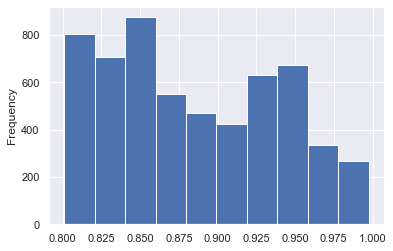

In [879]:
answers_modify['CONFIDENCE_1'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

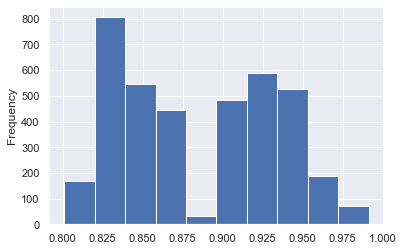

In [880]:
answers_modify['CONFIDENCE_2'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

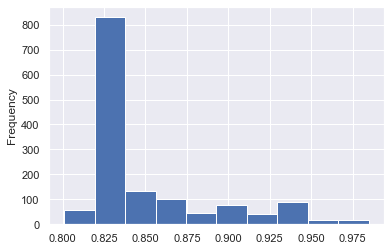

In [881]:
answers_modify['CONFIDENCE_3'].plot(kind='hist')

In [882]:
answers

,ID,Idade,Renda,Regiao,Genero,seguro auto,seguro vida Emp,seguro vida PF,Seguro Residencial,Investimento Fundos_cambiais,...,Emprestimo _educacao,Emprestimo _viagem,Investimento CDB,Investimento Fundos,RECOMMENDATION_1,CONFIDENCE_1,RECOMMENDATION_2,CONFIDENCE_2,RECOMMENDATION_3,CONFIDENCE_3
0,1004.0,40.685,8474.687,CO,1.0,F,F,F,F,F,...,T,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
1,1028.0,56.693,7996.353,SE,0.0,F,F,F,F,T,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
2,1034.0,49.413,8624.335,NE,0.0,T,T,T,T,F,...,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
3,1035.0,22.764,6885.196,S,1.0,F,F,F,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
4,1039.0,22.059,7749.965,NE,1.0,T,T,T,T,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13725,100932.0,28.659,8804.506,S,1.0,F,F,F,F,F,...,F,F,F,F,NaN,NaN,NaN,NaN,NaN,NaN
13726,100962.0,20.505,6809.895,SE,0.0,F,F,F,F,F,...,F,T,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13727,100963.0,21.067,6201.485,SE,1.0,F,F,F,F,F,...,F,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN
13728,100978.0,43.481,8130.084,N,0.0,T,T,T,T,F,...,T,F,T,F,NaN,NaN,NaN,NaN,NaN,NaN


In [883]:
answers['RECOMMENDATION_1'] = values_consequent_1
answers['CONFIDENCE_1'] = values_confidence_1

answers['RECOMMENDATION_2'] = values_consequent_2
answers['CONFIDENCE_2'] = values_confidence_2

answers['RECOMMENDATION_3'] = values_consequent_3
answers['CONFIDENCE_3'] = values_confidence_3

In [884]:
# Gravar o arquivo .csv
# answers.to_csv('answers_complete.csv', index=False)